For pharmaceutical sales analytics with geographical division and different categories of medicines, you can use various statistical and analytical models. Here are some commonly used models and techniques:



1. Descriptive Analytics

   - Summary Statistics: Mean, median, mode, standard deviation, and variance to understand the distribution of sales data.

   - Time Series Analysis: Analyze sales data over time to identify trends and seasonality.

   - Geospatial Analysis: Use GIS techniques to visualize sales data across different regions.



2. Predictive Analytics

   - Linear Regression: Predict future sales based on historical data and identify factors influencing sales.

   - Time Series Forecasting Models: 

     - ARIMA (Auto-Regressive Integrated Moving Average): Model and forecast sales data considering trends and seasonality.

     - Exponential Smoothing (ETS): Model to capture trend and seasonality for forecasting.

   - Machine Learning Models:

     - Random Forest: For complex datasets with multiple features.

     - Gradient Boosting Machines (GBM): For high accuracy in prediction tasks.



3. Segmentation Analysis

   - Cluster Analysis (K-Means, Hierarchical Clustering): Group regions or customer segments based on sales patterns and characteristics.

   - RFM Analysis (Recency, Frequency, Monetary): Segment customers based on their purchase behavior.



4. Causal Analysis

   - ANOVA (Analysis of Variance): Test for significant differences between different groups (e.g., different regions or medicine categories).

   - Regression Analysis: Identify and quantify the impact of different factors on sales.



5. Classification Models

   - Logistic Regression: Classify sales outcomes (e.g., high vs. low sales regions).

   - Decision Trees: For understanding decision paths influencing sales outcomes.



6. Advanced Analytics

   - Market Basket Analysis (Association Rule Mining): Identify associations between different medicines purchased together.

   - Survival Analysis: Model the time until a specific event occurs (e.g., time until next purchase).



7. Geospatial Models

   - Spatial Regression Models: Account for spatial autocorrelation in sales data.

   - Heatmaps: Visualize density and intensity of sales across different regions.



8. Optimization Models

   - Linear Programming: Optimize resource allocation for sales and distribution.

   - Simulation Models: Model various scenarios to predict outcomes and optimize strategies.



Example Workflow:

1. Data Exploration and Cleaning:

   - Use summary statistics and visualizations.

2. Descriptive Analytics:

   - Implement time series analysis and geospatial visualization.

3. Predictive Modeling:

   - Choose ARIMA for time series forecasting.

   - Apply linear regression for understanding factors influencing sales.

4. Segmentation:

   - Perform cluster analysis to identify patterns among regions or customer groups.

5. Advanced Analytics:

   - Use market basket analysis to understand co-purchase behavior.

6. Reporting and Visualization:

   - Develop dashboards using tools like Tableau or Power BI.



By applying these models, you can gain deep insights into pharmaceutical sales patterns, forecast future sales, and make data-driven decisions for different geographical divisions and medicine categories.



Here's an end-to-end example in Python using common libraries like Pandas, Scikit-learn, Statsmodels, and Matplotlib for a pharmaceutical sales analytics system. This code assumes you have a dataset `sales_data.csv` containing columns for `date`, `region`, `medicine_category`, `sales`, and other relevant data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [3]:
# data directory
import os

# Get the current working directory
current_dir = os.getcwd()

# Define the data directory path relative to the current directory (e.g., a subfolder named 'data')
data_dir = os.path.join(current_dir, 'pharma_sales_data')

# Print the data directory path for confirmation (optional)
print(f"Data directory set to: {data_dir}")


Data directory set to: /home/dhiraj/Desktop/python/notebooks/data_analysis/pharma_sales_data


In [5]:
# load the dataset
data = pd.read_csv(os.path.join(data_dir, 'salesdaily.csv'))

In [6]:
# display the data
print(data.head())

      datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday  


### Data Cleaning

In [8]:
# Check for missing values
print(data.isnull().sum())

datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64


In [9]:
# fill or drop missing values
data = data.dropna()

In [10]:
# Convert categorical data to numerical
data['day_of_week'] = data['Weekday Name'].astype('category').cat.codes


In [11]:
# Display the data again
print(data.head())

      datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  day_of_week  
0   248     Thursday            4  
1   276       Friday            0  
2   276     Saturday            2  
3   276       Sunday            3  
4   276       Monday            1  


In [13]:
# Convert date col
data['date'] = pd.to_datetime(data['datum'])

In [14]:
# display data
print(data.head())

      datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  day_of_week       date  
0   248     Thursday            4 2014-01-02  
1   276       Friday            0 2014-01-03  
2   276     Saturday            2 2014-01-04  
3   276       Sunday            3 2014-01-05  
4   276       Monday            1 2014-01-06  


In [17]:
print(data.columns)

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06', 'Year', 'Month', 'Hour', 'Weekday Name', 'day_of_week', 'date'],
      dtype='object')


In [18]:
# Remove col not required
try:
  # Attempt to drop the column
  data.drop('datum', axis=1, inplace=True)
except KeyError:
  # If the column doesn't exist, print a message
  print("Column 'datum' not found in the DataFrame.")

print(data)

      M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year  Month  Hour  \
0      0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014      1   248   
1      8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014      1   276   
2      2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014      1   276   
3      4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014      1   276   
4      5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014      1   276   
...     ...     ...    ...    ...   ...   ...   ...   ...   ...    ...   ...   
2101   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019     10   276   
2102   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019     10   276   
2103   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019     10   276   
2104   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019     10   276   
2105   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019     10   190   

     Weekday Name  day_of_week       da

In [19]:
# Set 'date' as the index
data = data.set_index('date')
print(data.head())

            M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
date                                                                         
2014-01-02    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
2014-01-03    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2014-01-04    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
2014-01-05    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
2014-01-06    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

            Hour Weekday Name  day_of_week  
date                                        
2014-01-02   248     Thursday            4  
2014-01-03   276       Friday            0  
2014-01-04   276     Saturday            2  
2014-01-05   276       Sunday            3  
2014-01-06   276       Monday            1  


In [21]:
# List of columns to sum for the 'total' column
sales_cols = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Add 'total' column by summing sales columns
data['total'] = data[sales_cols].sum(axis=1)

print(data.head())

            M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
date                                                                         
2014-01-02    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
2014-01-03    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2014-01-04    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
2014-01-05    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
2014-01-06    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

            Hour Weekday Name  day_of_week   total  
date                                                
2014-01-02   248     Thursday            4   48.47  
2014-01-03   276       Friday            0  107.00  
2014-01-04   276     Saturday            2   91.35  
2014-01-05   276       Sunday            3   66.10  
2014-01-06   276       Monday            1   58.20  


### Exploratory Data Analysis

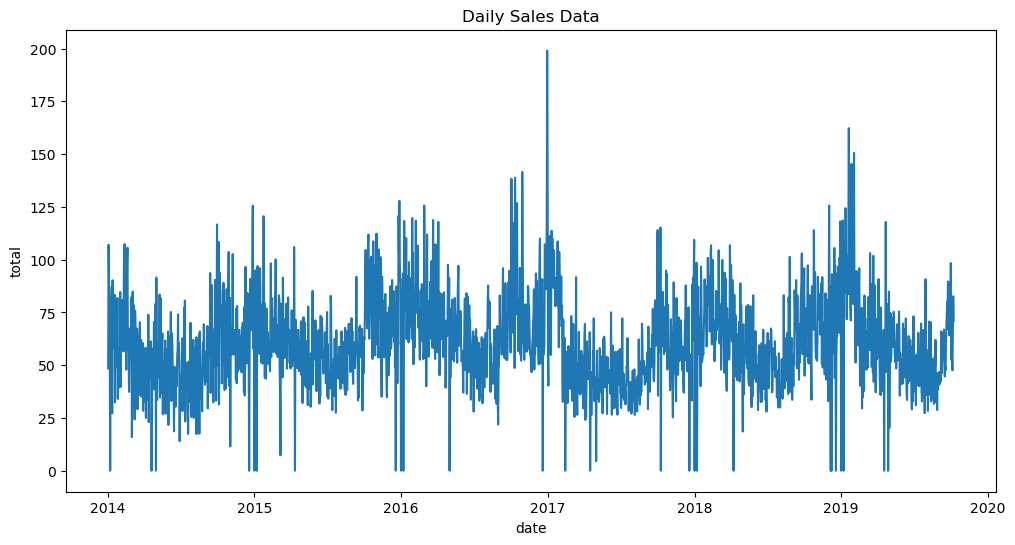

In [25]:
# Sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total', data=data)
plt.title('Daily Sales Data')
plt.show()

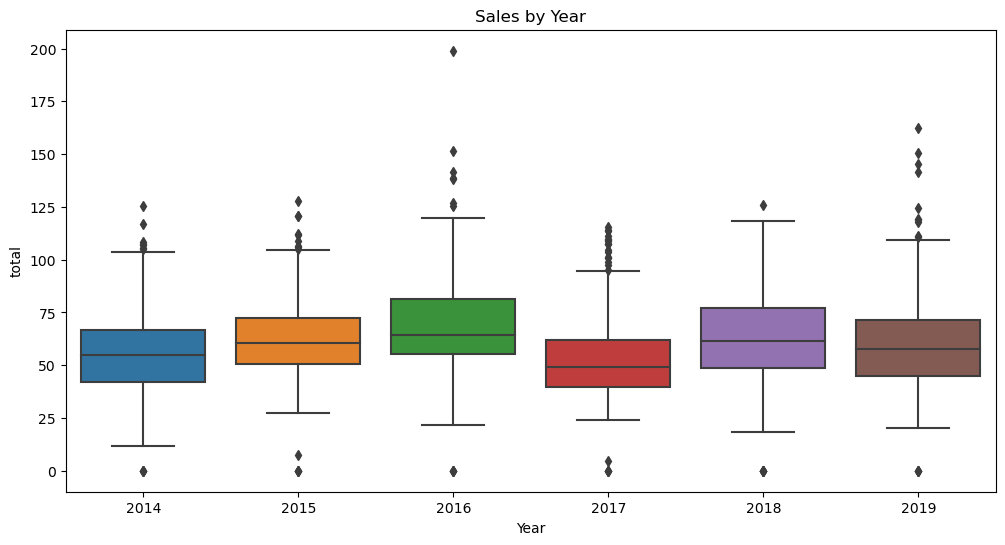

In [26]:
# sales by product
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='total', data=data)
plt.title('Sales by Year')
plt.show()

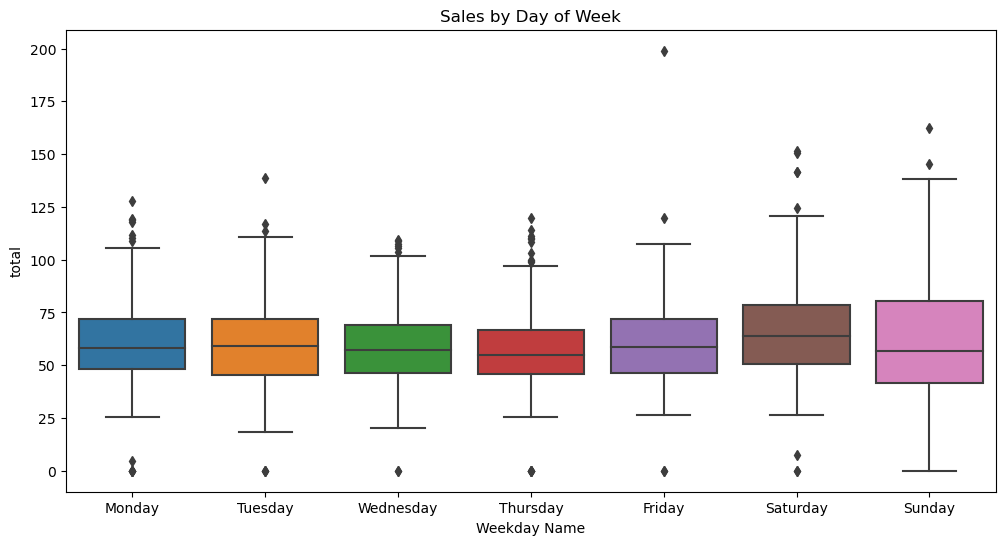

In [29]:
# Sales by weekday category
# Define order for weekdays (optional)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort DataFrame by 'Weekday Name' (optional)
if weekday_order:
    data = data.sort_values(by='Weekday Name')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Weekday Name', y='total', data=data, order=weekday_order)
plt.title('Sales by Day of Week')
plt.show()

### Time Series Forcasting

In [31]:
# Aggregate sales data by date
time_series_data = data.groupby('date')['total'].sum().asfreq('D').fillna(0)

In [32]:
# Train-test split
train_data = time_series_data[:int(0.8 * len(time_series_data))]
test_data = time_series_data[int(0.8 * len(time_series_data)):]

In [33]:
# Fit  defines a Seasonal AutoRegressive Integrated Moving Average 
# with eXogenous factors (SARIMAX) model
# p (Autoregressive order): This specifies the number of past lags of 
# the target variable to include in the model. In this case, 
# p=1 indicates that the model will consider the influence of 
# the immediately preceding value (lag 1) on the current value.
# d (Differencing order): This represents the number of times the data needs to be 
# differenced to achieve stationarity (no trend or seasonality).
# q (Moving Average order): This defines the number of past forecast errors (residuals) 
# to include in the model. A value of q=1 means the model will consider 
# the most recent error term along with the past value (lag 1) to predict the current value.
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)

In [34]:
# Forecast
forecast = sarima_fit.get_forecast(steps=len(test_data))
predicted_sales = forecast.predicted_mean

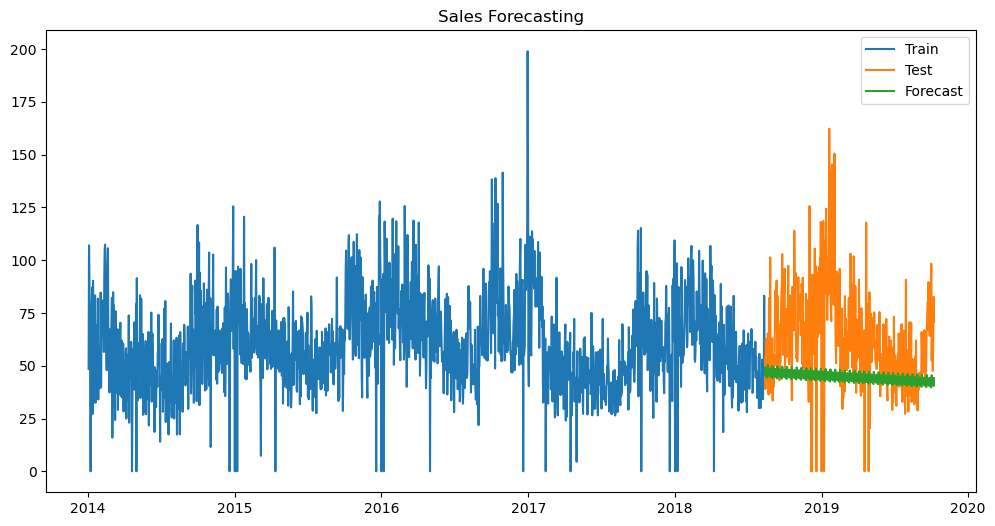

In [35]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(predicted_sales.index, predicted_sales, label='Forecast')
plt.title('Sales Forecasting')
plt.legend()
plt.show()

### Regression Analysis

In [36]:
# Feature selection
features = sales_cols
X = data[features]
y = data['total']


In [38]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Fit the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict and evaluate
y_pred = regressor.predict(X_test)
print('R^2 Score:', regressor.score(X_test, y_test))

R^2 Score: 1.0


### Cluster Analysis

In [42]:
# Prepare data for clustering
day_wise_sales = data.groupby('day_of_week')['total'].sum().reset_index()
X_cluster = day_wise_sales[['total']]

In [46]:
# Fit K-Means model
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
day_wise_sales['cluster'] = kmeans.fit_predict(X_cluster)

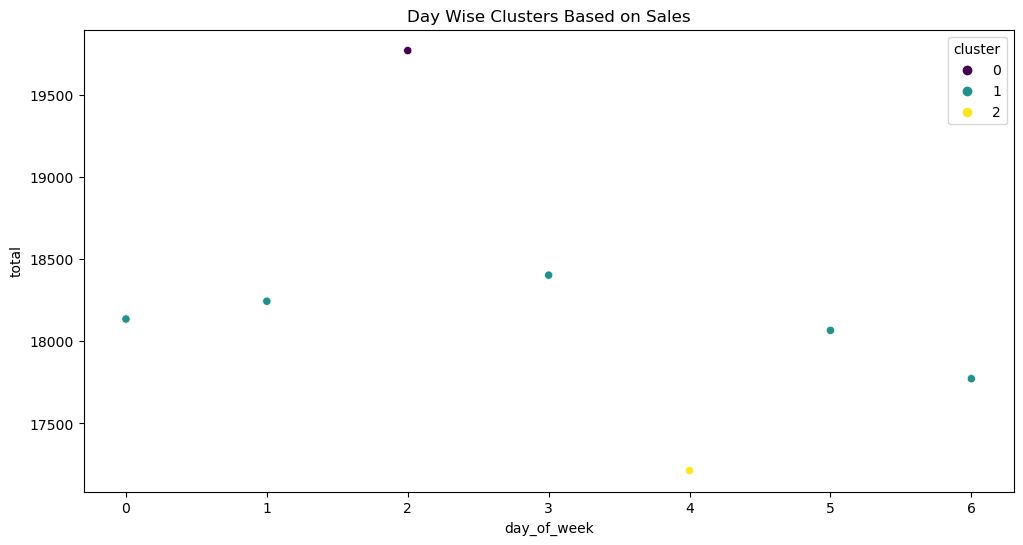

In [47]:
# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='day_of_week', y='total', hue='cluster', data=day_wise_sales, palette='viridis')
plt.title('Day Wise Clusters Based on Sales')
plt.show()

### Reporting and Visualizations

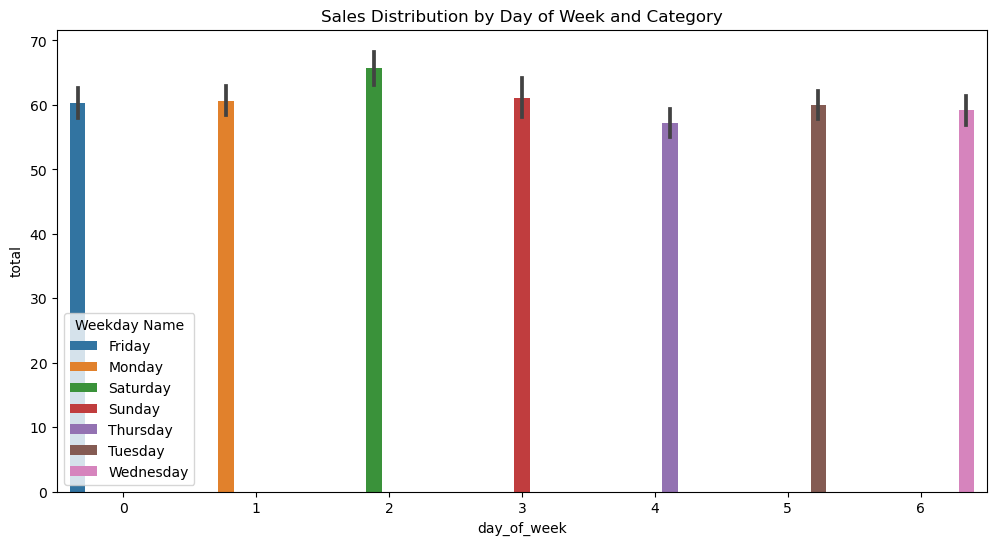

In [50]:
# Sales distribution by day of week and category
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='total', hue='Weekday Name', data=data)
plt.title('Sales Distribution by Day of Week and Category')
plt.show()